### Let's import required libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import joblib
import warnings
warnings.filterwarnings('ignore')

### We will import the excel file for analysis now:

In [2]:
pd.set_option('display.max_colwidth',100 )
cd=pd.read_excel("Rating.xlsx")
data=pd.DataFrame(data=cd)
data

,Unnamed: 0,Rating,Review,Review_title
0,0,5star,Earlier i was using apple ipod but sound was not that much good and today i got this. Seriously ...,"""Amazing sound """
1,1,5star,I mean for this price.... they're really nice one Good quality... Aesthetically pleasing and sou...,"""Nice """
2,2,5star,perfect fitting nice sound quality awesome,"""Amazing Product"""
3,3,5star,Decent product. Worth giving a try!,"""Good"""
4,4,5star,Very good colour for girls . Nice voice i liked it. Price is good,"""Very good product"""
...,...,...,...,...
29016,1089,2,When I press the input mode change buttons on speaker or the remote there are only three options...,Sounds Quality is good but USB/SD mode not working
29017,1090,2,It's an amazing product but the one thing lack is bass control its poor. At this price range it ...,Ok ok it's sound is good but base quality very poor.
29018,1091,2,sound quality is ok bass is not good and if you are buying it for Bluetooth dont buy the worst B...,For wireless worst product
29019,1092,2,Worst ever music system just in a month it's 2 satellite audio Jack's got bad. Now i have to car...,Got bad in a month 😞. They are hundreds of complaints don't buy. And don't ignore complaints.


In [3]:
data.columns

Index(['Unnamed: 0', 'Rating', 'Review', 'Review_title'], dtype='object')

Above is the list of columns in our database.

In [4]:
data.shape

(29021, 4)

 Our database consists of 4 columns and 29021 rows.

In [5]:
data.dtypes

Unnamed: 0       int64
Rating          object
Review          object
Review_title    object
dtype: object

Our dataset consists of integer and object type of data.

In [6]:
#Unnamed: 0 is not required for further analysis hence we will drop the column
data.drop('Unnamed: 0',axis=1, inplace=True)

Lets check for null values:

In [7]:
data.isnull().sum()

Rating          0
Review          1
Review_title    0
dtype: int64

Review column has one null value in it.

In [8]:
data.dropna(inplace=True)#dropped rows which consists of null values

In [9]:
#lets check number of unique values in all columns
data.nunique()

Rating             10
Review          13350
Review_title     1672
dtype: int64

Our rating should only consist of 5 unique values i.e 1, 2, 3, 4, 5. let's have a look at rating column data with the help of countplot.

<AxesSubplot:xlabel='Rating', ylabel='count'>

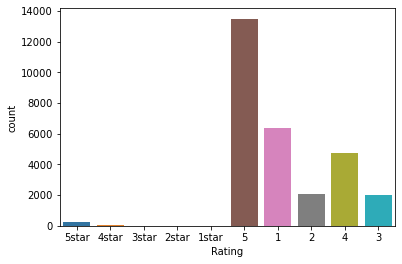

In [10]:
sns.countplot(data["Rating"])

In [11]:
data['Rating'] = data['Rating'].replace(['1star'],1, regex=True)#replacing 1star with 1
data['Rating'] = data['Rating'].replace(['2star'],2, regex=True)#replacing 2star with 2
data['Rating'] = data['Rating'].replace(['3star'],3, regex=True)#replacing 3star with 3
data['Rating'] = data['Rating'].replace(['4star'],4, regex=True)#replacing 4star with 4
data['Rating'] = data['Rating'].replace(['5star'],5, regex=True)#replacing 5star with 5

<AxesSubplot:xlabel='Rating', ylabel='count'>

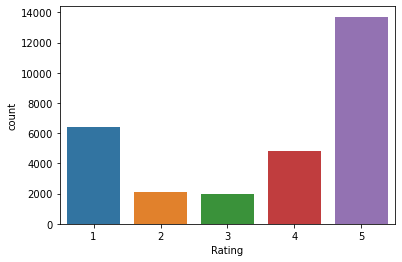

In [12]:
# reviewing rating column again
sns.countplot(data["Rating"])

In [13]:
#lets look at counts of each values
data['Rating'].value_counts()

5    13709
1     6403
4     4802
2     2103
3     2003
Name: Rating, dtype: int64

In [14]:
data.shape 

(29020, 3)

### Let's do preprocessing of data with the help of NLP:

In [15]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
print("Stopwords :\n", stopwords.words("english"))
print("\n \n Punctuations :\n",string.punctuation)

Stopwords :
 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

In [16]:
punct=string.punctuation

In [17]:
#function to remove punctuation
def remove_punctuation(txt):
    txt_nopunct="".join([c for c in txt if c not in punct])
    return txt_nopunct

In [18]:
#function to remove stopwords
def rem_stopworrds(text):
    stop_words=set(stopwords.words("english"))
    word_tokens=word_tokenize(text)
    filtered_text=" ".join([word for word in word_tokens if word not in stop_words])
    return filtered_text

In [19]:
#let's preprocss all 3 columns
data['Review'] = data['Review'].apply(lambda x: x.lower())# lets change the review into lowercase
data['Review_title'] = data['Review_title'].apply(lambda x: x.lower())# lets change the review_title into lowercase

data['Review'] = data['Review'].apply(lambda x: remove_punctuation(x))
data['Review'] = data['Review'].apply(lambda x: rem_stopworrds(x))

data['Review_title'] = data['Review_title'].apply(lambda x: remove_punctuation(x))
data['Review_title'] = data['Review_title'].apply(lambda x: remove_punctuation(x))

In [20]:
data['Review']

0        earlier using apple ipod sound much good today got seriously ipod amazing sound quality bass eve...
1                   mean price theyre really nice one good quality aesthetically pleasing sound quality good
2                                                                 perfect fitting nice sound quality awesome
3                                                                            decent product worth giving try
4                                                              good colour girls nice voice liked price good
                                                        ...                                                 
29016    press input mode change buttons speaker remote three options aux bluetooth fm option usb sd card...
29017    amazing product one thing lack bass control poor price range could given better features atleast...
29018    sound quality ok bass good buying bluetooth dont buy worst bluetooth quality range buy portable ...
29019    worst ever

In [25]:
import nltk
nltk.download('wordnet')
wn=nltk.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
#lemmatization function
def lemmatization(txt):
    text="".join(wn.lemmatize(c) for c in txt)
    return text

In [27]:
#lemmatized the reviews
data['Review'] = data['Review'].apply(lambda x: lemmatization(x))

In [28]:
data['Review']

0        earlier using apple ipod sound much good today got seriously ipod amazing sound quality bass eve...
1                   mean price theyre really nice one good quality aesthetically pleasing sound quality good
2                                                                 perfect fitting nice sound quality awesome
3                                                                            decent product worth giving try
4                                                              good colour girls nice voice liked price good
                                                        ...                                                 
29016    press input mode change buttons speaker remote three options aux bluetooth fm option usb sd card...
29017    amazing product one thing lack bass control poor price range could given better features atleast...
29018    sound quality ok bass good buying bluetooth dont buy worst bluetooth quality range buy portable ...
29019    worst ever

Let's join all words in review column in a variable text:

In [29]:
text = " ".join(review for review in data['Review'])
print ("There are {} words in the combination of all review.".format(len(text)))

There are 1862925 words in the combination of all review.


In [30]:
stopwords_en = set(stopwords.words('english'))

### Wordcloud

Word cloud of word in text variable:

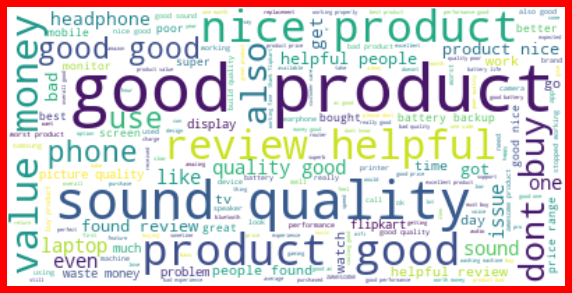

In [31]:
# Create stopword list:
stopwords = set(stopwords_en)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Above cloud gives us the most common words in entire reviews in bigfont size, word with smaller size are less used or less common.

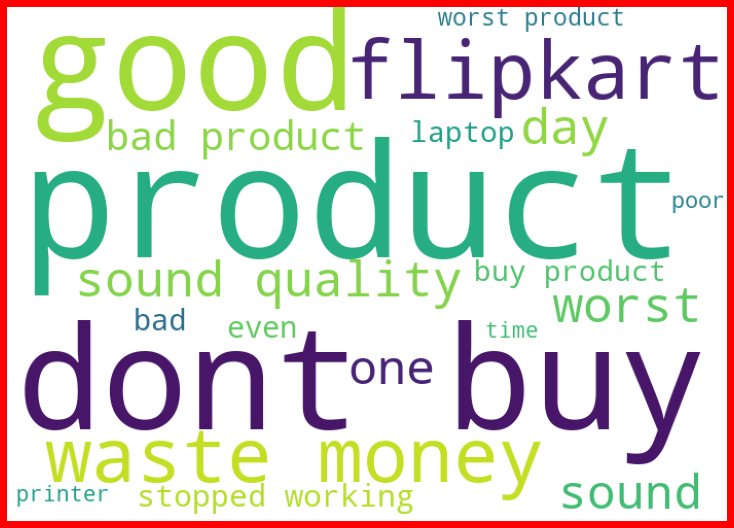

In [32]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


view = data['Review'][data['Rating']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(view))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

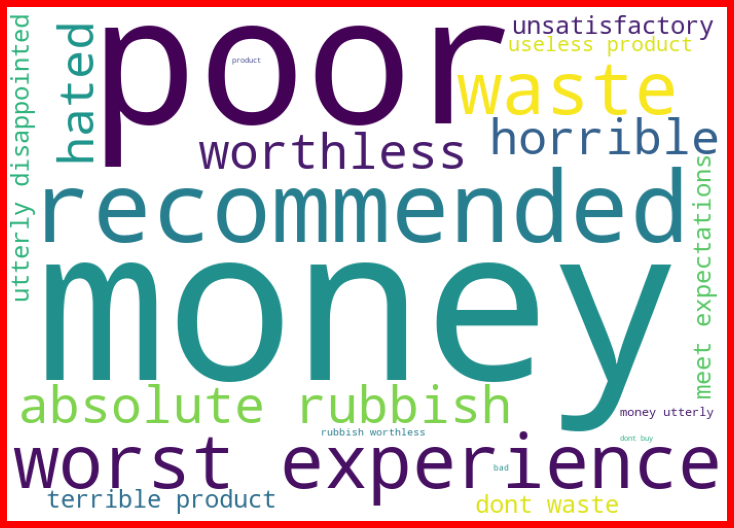

In [33]:
#Getting sense of loud words 
from wordcloud import WordCloud


view = data['Review_title'][data['Rating']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(view))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Let's use TFidf method to transform data into vectors:

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
tfidf=TfidfVectorizer(max_features=20000, ngram_range=(1,3),analyzer="char")

In [36]:
x=tfidf.fit_transform(data['Review'])
y=data['Rating']

In [37]:
print(x.shape,y.shape)

(29020, 13343) (29020,)


We will use undersampling method to balance the target column value counts:

In [38]:
from imblearn import under_sampling
from collections import Counter

In [39]:
from imblearn.under_sampling import RandomUnderSampler

rus=RandomUnderSampler(random_state=0)
x_resample,y_resampled=rus.fit_resample(x,y)
print(sorted(Counter(y_resampled)),y_resampled.shape)

[1, 2, 3, 4, 5] (10015,)


In [40]:
y_resampled.value_counts()

1    2003
2    2003
3    2003
4    2003
5    2003
Name: Rating, dtype: int64

In [41]:
x_resample.shape

(10015, 13343)

In [42]:
y_resampled.shape

(10015,)

In [43]:
x=x_resample
y=y_resampled

In [44]:
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [45]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8012, 13343), (8012,), (2003, 13343), (2003,))

### Let's find best random state:

In [46]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, " on Random State ",maxRS)

Best accuracy is  0.5831253120319521  on Random State  21


### Model Building:

In [47]:
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=maxRS)

In [48]:
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),AdaBoostClassifier(),RandomForestClassifier()]

for m in model:
    m.fit(x_train,y_train)
    #m.score(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('Accuracy Score of',m,'is:', acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('\n')

Accuracy Score of LogisticRegression() is: 0.5831253120319521
[[273  61  31  15   8]
 [ 67 253  46  13   2]
 [ 62  53 186  72  43]
 [ 21  23  47 231  88]
 [ 14  20  31 118 225]]
              precision    recall  f1-score   support

           1       0.62      0.70      0.66       388
           2       0.62      0.66      0.64       381
           3       0.55      0.45      0.49       416
           4       0.51      0.56      0.54       410
           5       0.61      0.55      0.58       408

    accuracy                           0.58      2003
   macro avg       0.58      0.59      0.58      2003
weighted avg       0.58      0.58      0.58      2003



Accuracy Score of DecisionTreeClassifier() is: 0.5666500249625561
[[246  53  35  25  29]
 [ 65 205  54  36  21]
 [ 42  31 236  71  36]
 [ 26  23  45 254  62]
 [ 31  22  35 126 194]]
              precision    recall  f1-score   support

           1       0.60      0.63      0.62       388
           2       0.61      0.54      0

### Hyper parameter tunning:

In [49]:
from sklearn.model_selection import RandomizedSearchCV
#creating  parameter list to pass in RandomizedSearchCV

LogisticRegression

In [61]:
#DecisionTreeClassifier parameters
parameters1={'penalty':['l2','l1','elasticnet', 'none'], 'dual':[False],'tol':[0.0001],'C':[1.0],
            'fit_intercept':[True,False],'intercept_scaling':[1], 'class_weight':[None], 'random_state':range(0,20),
            'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'max_iter':[100],
            'multi_class':['auto', 'ovr', 'multinomial'], 'verbose':[0],'warm_start':[True,False],
            'n_jobs':[None], 'l1_ratio':[None]}

In [62]:
RSV1=RandomizedSearchCV(LogisticRegression(),parameters1,cv=5)

In [63]:
RSV1.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [1.0], 'class_weight': [None],
                                        'dual': [False],
                                        'fit_intercept': [True, False],
                                        'intercept_scaling': [1],
                                        'l1_ratio': [None], 'max_iter': [100],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'n_jobs': [None],
                                        'penalty': ['l2', 'l1', 'elasticnet',
                                                    'none'],
                                        'random_state': range(0, 20),
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag', 'saga'],
                              

In [64]:
RSV1.best_params_

{'warm_start': False,
 'verbose': 0,
 'tol': 0.0001,
 'solver': 'saga',
 'random_state': 1,
 'penalty': 'none',
 'n_jobs': None,
 'multi_class': 'ovr',
 'max_iter': 100,
 'l1_ratio': None,
 'intercept_scaling': 1,
 'fit_intercept': True,
 'dual': False,
 'class_weight': None,
 'C': 1.0}

In [65]:
RSV_pred1=RSV1.best_estimator_.predict(x_test) 

In [66]:
RSV_pred1

array([5, 2, 5, ..., 1, 3, 4], dtype=int64)

In [67]:
RSV1.score(x_train,y_train)

0.8502246630054917

Hyper parameter tunning with LogisticRegression gives us 85.02 % accuracy.

DecisionTreeClassifier

In [68]:
#DecisionTreeClassifier parameters
parameters2={'criterion':["gini", "entropy"],'splitter':["best", "random"],
            'max_depth':[None],'random_state':range(0,20),
            'max_leaf_nodes':[None],'class_weight':[None], 'min_samples_split':[1,2,3],
            'min_samples_leaf':[1,2,3],'max_features':[None],'min_impurity_decrease':[0.0,1.0,2.0],
            'min_weight_fraction_leaf':[0.0,1.0,2.0]}

In [69]:
RSV2=RandomizedSearchCV(DecisionTreeClassifier(),parameters2,cv=5)

In [70]:
RSV2.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'class_weight': [None],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None],
                                        'max_features': [None],
                                        'max_leaf_nodes': [None],
                                        'min_impurity_decrease': [0.0, 1.0,
                                                                  2.0],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [1, 2, 3],
                                        'min_weight_fraction_leaf': [0.0, 1.0,
                                                                     2.0],
                                        'random_state': range(0, 20),
                                        'splitter': ['best', 'random']})

In [71]:
RSV2.best_params_

{'splitter': 'random',
 'random_state': 1,
 'min_weight_fraction_leaf': 0.0,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'min_impurity_decrease': 0.0,
 'max_leaf_nodes': None,
 'max_features': None,
 'max_depth': None,
 'criterion': 'gini',
 'class_weight': None}

In [72]:
RSV_pred2=RSV2.best_estimator_.predict(x_test) 

In [73]:
RSV_pred2

array([5, 5, 5, ..., 4, 2, 3], dtype=int64)

In [74]:
RSV2.score(x_train,y_train)

0.8121567648527209

Hyper parameter tunning with DecisionTreeClassifier gives us 81.21 % accuracy.

SVC

In [75]:
#SVC parameters
parameters3={'C':[1, 10, 100, 1000],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'degree':[3],'gamma':['scale', 'auto'],'coef0':[0.0],'shrinking':[True,False],
    'probability':[True,False],'tol':[0.001],'cache_size':[200],
    'class_weight':[None],'decision_function_shape':['ovr'],
    'break_ties':[True,False],'random_state':range(0,20)}

In [76]:
RSV3=RandomizedSearchCV(SVC(),parameters3,cv=5)

In [77]:
RSV3.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1, 10, 100, 1000],
                                        'break_ties': [True, False],
                                        'cache_size': [200],
                                        'class_weight': [None], 'coef0': [0.0],
                                        'decision_function_shape': ['ovr'],
                                        'degree': [3],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid'],
                                        'probability': [True, False],
                                        'random_state': range(0, 20),
                                        'shrinking': [True, False],
                                        'tol': [0.001]})

In [78]:
RSV3.best_params_

{'tol': 0.001,
 'shrinking': True,
 'random_state': 17,
 'probability': True,
 'kernel': 'poly',
 'gamma': 'scale',
 'degree': 3,
 'decision_function_shape': 'ovr',
 'coef0': 0.0,
 'class_weight': None,
 'cache_size': 200,
 'break_ties': False,
 'C': 1}

In [79]:
RSV_pred3=RSV3.best_estimator_.predict(x_test) 

In [80]:
RSV_pred3

array([5, 2, 5, ..., 1, 4, 4], dtype=int64)

In [81]:
RSV3.score(x_train,y_train)

0.858337493759361

Hyper parameter tunning with SVC gives us 85.83 % accuracy.

AdaBoostClassifier

In [82]:
parameters4={'base_estimator':[None],'n_estimators':[20,40, 50,75,100],
            'learning_rate':[0.1,0.01,1.0,2.0],'algorithm':['SAMME.R','SAMME'],
            'random_state':range(0,20)}

In [83]:
RSV4=RandomizedSearchCV(AdaBoostClassifier(),parameters4,cv=5)

In [84]:
RSV4.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(),
                   param_distributions={'algorithm': ['SAMME.R', 'SAMME'],
                                        'base_estimator': [None],
                                        'learning_rate': [0.1, 0.01, 1.0, 2.0],
                                        'n_estimators': [20, 40, 50, 75, 100],
                                        'random_state': range(0, 20)})

In [85]:
RSV4.best_params_

{'random_state': 15,
 'n_estimators': 50,
 'learning_rate': 1.0,
 'base_estimator': None,
 'algorithm': 'SAMME.R'}

In [86]:
RSV_pred4=RSV4.best_estimator_.predict(x_test) 

In [87]:
RSV_pred4

array([5, 1, 5, ..., 1, 3, 5], dtype=int64)

In [88]:
RSV4.score(x_train,y_train)

0.46829755366949577

Hyper parameter tunning with adaboost classifier gives us 46.82 % accuracy.

RandomForestClassifier

In [92]:
parameters5={'n_estimators':[100],'criterion':['gini','entropy'],'max_depth':[None],
            'min_samples_split':[2],'min_samples_leaf':[1],'min_weight_fraction_leaf':[0.0],
            'max_features':['auto'],'max_leaf_nodes':[None],'min_impurity_decrease':[0.0],
            'bootstrap':[True,False],'oob_score':[True,False],'n_jobs':[None],
            'random_state':range(0,20),'verbose':[0],'warm_start':[True,False],'class_weight':[None],
            'ccp_alpha':[0.0],'max_samples':[None]}

In [93]:
RSV5=RandomizedSearchCV(RandomForestClassifier(),parameters5,cv=5)

In [94]:
RSV5.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'ccp_alpha': [0.0],
                                        'class_weight': [None],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None],
                                        'max_features': ['auto'],
                                        'max_leaf_nodes': [None],
                                        'max_samples': [None],
                                        'min_impurity_decrease': [0.0],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [2],
                                        'min_weight_fraction_leaf': [0.0],
                                        'n_estimators': [100], 'n_jobs': [None],
                                        'oob_score': [True

In [95]:
RSV5.best_params_

{'warm_start': True,
 'verbose': 0,
 'random_state': 18,
 'oob_score': False,
 'n_jobs': None,
 'n_estimators': 100,
 'min_weight_fraction_leaf': 0.0,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_impurity_decrease': 0.0,
 'max_samples': None,
 'max_leaf_nodes': None,
 'max_features': 'auto',
 'max_depth': None,
 'criterion': 'gini',
 'class_weight': None,
 'ccp_alpha': 0.0,
 'bootstrap': True}

In [96]:
RSV_pred5=RSV5.best_estimator_.predict(x_test) 

In [97]:
RSV_pred5

array([5, 2, 5, ..., 1, 1, 5], dtype=int64)

In [98]:
RSV5.score(x_train,y_train)

0.8775586620069895

Hyper parameter tunning with RandomForestClassifier gives us 87.76% accuracy.

Considering RandomForestClassifier with RandomizedSearchCV as final model for saving model.

### Saving model

In [99]:
import joblib
joblib.dump(RSV5,"RSVRPP.obj")

['RSVRPP.obj']

In [100]:
RSVfile=joblib.load("RSVRPP.obj")
RSVfile.predict(x_test)

array([5, 2, 5, ..., 1, 1, 5], dtype=int64)

In [ ]:
#end